In [145]:
import yfinance as yf
import pandas as pd
from pandas_datareader import data as pdr

In [146]:
asxTicker = 'AX1.AX'

data = yf.download(
        tickers = asxTicker,
        period = "1y",
        interval="1wk")

[*********************100%***********************]  1 of 1 completed


In [147]:
dataFrame = pd.DataFrame({"Open":data['Open'], "Close": data['Close'], "Volume": data['Volume']})

dataFrame['Delta'] = dataFrame['Close'] - dataFrame['Open']

<AxesSubplot:label='d6fc5f17-8c08-4736-a45e-1c02c5b50c8e'>

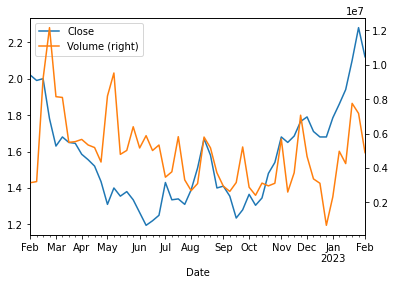

In [148]:
dataFrame = dataFrame.reset_index()

ax = dataFrame.plot('Date','Close')
dataFrame.plot('Date', 'Volume',secondary_y=True, ax=ax)

In [120]:
def func(row):
    
    if row['Open'] > row['Close']:
        val = "Gain"
    elif row['Close'] < row['Open']:
        val = "Loss"
    else:
        val = "No Change"
    return val

dataFrame['Price Movement (Gain/Loss)'] = dataFrame.apply(func, axis=1)

# dataFrame